<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoUB.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Pràctica 1 - Grafs </h2>
</center>
</p>
</div>

<div class="alert alert-info">
<center>
  <h1>Introducción</h1>
</center>

In [22]:
%matplotlib inline
import networkx as nx
from util import get_metro_graph, draw_metro_graph, get_path_subgraph
from test import test


A lo largo de esta práctica trabajaremos con el grafo generado a partir de la red de metro de Barcelona. En este grafo los nodos representan las estaciones y los ejes las vías que van de una estación a otra. Todos los ejes tienen tres atributos:

* Linea
* Color
* Distancia


In [23]:
G = get_metro_graph('csv/lineasmetro.csv')
print G.get_edge_data(*G.edges()[0])

{'color': 'darkblue', 'distance': '855270', 'line': 'L5'}


Por otro lado los nodos en su lugar únicamente almacenan (y se indexan) por el nombre de la estación.

In [24]:
print G.nodes()[0]

Camp de l'Arpa


# util.py

En este archivo se os facilitan tres funciones que os permitiran cargar y visualizar la red de metro.
```python
G = get_metro_graph(location)
# Retorna un objeto nx.Graph que corresponde al grafo de la red de metro
# - location: ruta donde esta almacenado el archivo .csv

P = get_path_subgraph(P, path)
# Retorna un objeto tipo nx.Graph que almacena los nodos y los ejes correspondientes al
# camino que le pasamos por parametro
# - P: Grafo original
# - path: Lista de nodos sobre los que queremos crear el subgrafo

draw_metro_graph(G, figsize=(10,10))
# Dibuja el grafo que le pasemos por parametro.
# - G: Grafo de la red de metro
# - figsize: parametro opcional que nos permite definir el tamaño de la figura
```

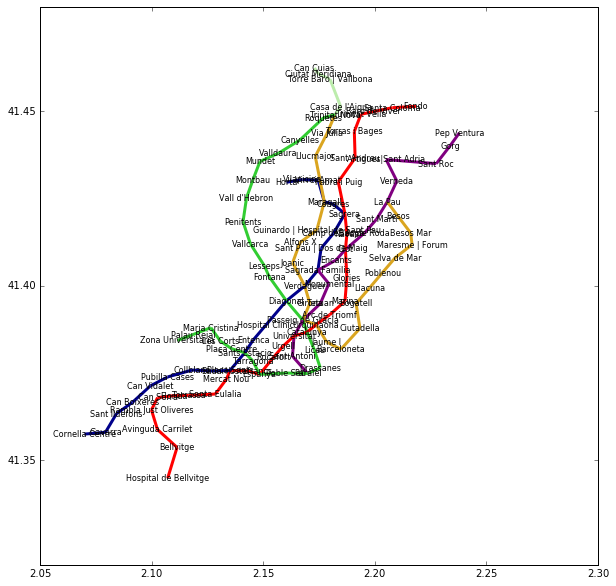

In [25]:
draw_metro_graph(G, figsize=(10,10))

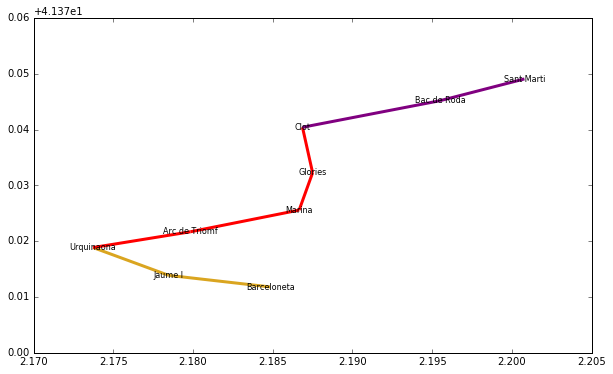

In [26]:
P = get_path_subgraph(G, [
        'Barceloneta',
        'Jaume I', 
        'Urquinaona', 
        'Arc de Triomf', 
        'Marina',
        'Glories',
        'Clot',
        'Bac de Roda',
        'Sant Marti'
    ])

draw_metro_graph(P)

# test.pyc

Este archivo contiene la función __test__ que servirá, a lo largo de la práctica para ir comprobando si los algoritmos implementados funcionan correctamente.

```python
    test(f_name, function)
    # Esta función hace un test de funcional y de forma de los algoritmos implementados.
    # - f_name: nombre de la funcion que queremos probar, a escoger: ['bfs', 'dijkstra', 'dijkstra2']
```

<div class="alert alert-info">
<center>
  <h1>Contenido</h1>
  </center><p>




<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Breadth First Search</p></h2>
  
  <p>
  En este primer apartado se propone la implementación del algoritmo _Breadth First Search_. Mediante este algoritmo pretendemos encontrar el camíno mínimo entre dos puntos del grafo.
  </p>
  <p>
  Se pide una implementación iterativa del algoritmo, en la que mediante una queue realizemos una exploración expansiva. Hay que tener en cuenta que la red de metro se construye como un grafo no dirigido, así que es importante controlar el hecho de que se visiten los nodos una sola vez.
  </p>
  
  <p>
  <a href="https://en.wikipedia.org/wiki/Breadth-first_search">Aquí</a> podeis encontrar mas detalles sobre la implementación y características de este algoritmo.
  </p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center> 

<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto te tipo _networkx.Graph_.</li>
<li>__origen__: Este parámetro corresponde al indice de un nodo. En este caso, como indexamos los nodos con el nombre de las paradas de Metro, deberá ser un String _(e.g. 'Tetuan')_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
</ul>
<br>
<h3>OUTPUT</h3>
El output de una funcion es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El numero de nodos que se han visitado para encontrar la solución.</li>
<ul>

</p>

</div>

In [27]:
def bfs(G, origen, destino):
    
    #Cua on anirem posant (i treien) els vertex 
    cua = [] #O(1)
    
    #Tupla formada per l'string de cada node i el cami que he recorregut de moment
    nodes_i_cami = (origen,[origen]) #O(1)
    
    #A la llista introdueixo aquesta tupla
    cua.append(nodes_i_cami) #O(1)
    
    #Llista amb True i Fals per cada node, és a dir, es convertirá en True si l'he visitat, False si no
    estat = [] #O(1)
    
    #Llista on guardo els strings dels nodes que he visitat
    node_visitat = [] #O(1)
    
    #Per cada vertex del graf:
    for vertex in G: #O(G*(1))
        
        #Si aquest es l'origen,
        if vertex == origen: #O(1)
            #Canvia el seu estat a true
            estat.append(True) #O(1)
        
        #Si no,
        else: 
            
            #Posa el seu estat a False
            estat.append(False) #O(1)
    
    #Mentre la cua no estigui buida,
    while cua: 
        
        #Agafa l'últim element de la cua, és a dir, el vertex (tupla[0]) i el cami que porto (tupla[1])
        actual,cami = cua.pop(0) #O(1)
        
        #Si el vertex que acabo d'agafar es el destí,
        if actual == destino: #O(1)
            return {
                'path' : cami, #Retorno el cami que porto fins ell,
                'expanded' : len(node_visitat) #I els nodes que he visitat per arribar-hi
            }
        
        #En canvi, si no es el desti i el vertex en questió (actual) no l'he visitat:
        if actual not in node_visitat:  #O(1)
                
                #Visita'l
                node_visitat.append(actual) #O(1)
                
                #Per cada vei que tingui
                for i,vertex in enumerate(G.neighbors(actual)): #O(1)
                    
                    #Canvia-l'hi l'estat a True
                    estat[i] = True #O(1)
                    
                    #I afegeixlo a la cua, sumant el cami que porto + ell mateix
                    cua.append((vertex,cami+[vertex]))  #O(1)

bfs(G,'Espanya','Sagrera')

{'expanded': 64,
 'path': ['Espanya',
  'Rocafort',
  'Urgell',
  'Universitat',
  'Passeig de Gracia',
  'Girona',
  'Verdaguer',
  'Sagrada Familia',
  'Sant Pau | Dos de Maig',
  "Camp de l'Arpa",
  'Sagrera']}

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Test </h3></p> </center> </div>

In [28]:
test('bfs', bfs)

== Test v0.3 ==
#1. Test de forma [OK]
#2. Test funcional
* Expanded [OK]
* Path [OK]


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> </div>

L'algoritme BFS (Breadth First Search) et permet trobar el camí mínim entre dos nodes d'un graf no dirigit i sense pesos. Per fer l'algoritme que he implementat m'he basat en el DFS, és a dir,és a dir, **utilitzo les llistes de Python com una cua on vaig afegint i extraien els nodes que visito** i que em porten al destí pel camí mínim. Aquesta cua es el que diferència el BFS i el DFS.

**Com que extrec i poso nodes** (strings) **en una llista** (cua), considerem la complexitat del BFS **com Θ(cardinalitat de vertex del graf + cardinalitat d'arestes del graf)**. Tenim:


In [28]:
edges = G.number_of_edges()
nodes = G.number_of_nodes()
print edges, "arestes"
print nodes, "nodes"

117 arestes
105 nodes


Doncs **concluim una complexitat de Θ(222)**, ja que "la funció" creix igual que n (222)

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-success" style="width:90%; margin:0 auto;">

  <h2><p>2- Dijkstra</p></h2>
  
  <p>
 En esta segunda parte de la práctica se propone que hagáis dos implementaciones del algoritmo <a href="https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm">Dijkstra</a>. 
 <ul><li>
 **dijkstra1:** La primera consiste en el algoritmo común en el que tendremos en cuenta las distancias definidas en los edges. 
 </li><li>
 **dijkstra2:** La segunda implementación es simplemente una ampliación del primer algoritmo en el que añadiremos una penalización por cambio de línea.</li>
 </ul>
</p>
<h3> Ejemplo _dijkstra2_</h3>
<p>
Para ilustrar lo que se pide en la práctica veamos como se calcularía el valor de **C** y **D** en el siguiente gráfico:
</p>


<p><center><img src='img/e1.png'></img></center></p>


<p>
<ul><li>
**[C]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(C) como V(B) + d([B,C]), ya hemos acabado.
</li>
<li>
**[D]** Calculamos V(B) como V(A) + d([A,B]), calculamos V(D) como V(B) + d([B,D]), como [A,B] es linea azul y [B,D] es linea verde, añadimos una penalización por el transbordo a la que llamamos **P**. Por lo tanto, al final obtenemos que V(D) = V(B) + d([B,C]) + P
</li>
</ul>

<br>
-**V(X)**: Valor de X
<br>
-**d([X,Y])**: Distancia de X a Y
<br>
-**P**: Penalización por transbordo

</p>


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Código </h3></p> </center>
<p>
<h3>INPUT</h3>
<ul>
<li>__G__: Este es el grafo (en el caso de esta practica la red de metro) que utilizaremos para buscar el camino. Debe de ser un objeto te tipo _networkx.Graph_.</li>
<li>__origen__: Este parámetro corresponde al indice de un nodo. En este caso, como indexamos los nodos con el nombre de las paradas de Metro, deberá ser un String _(e.g. 'Tetuan')_.</li>
<li>__destino__: El indice del nodo al que queremos llegar.</li>
<li>__infinity=*(int)*__: Parámetro opcional en el que definimos que número nos va bien para utilizar como infinito en el momento de inicializar los pesos de los nodos.</li>
<li>__penalty=*(int)*__: (_Solo necesario para dijkstra2)_ Es un numero entero que corresponde a la penalización que aplicamos al valor de un nodo cuando hay cambio de línea.
</ul>
<br>
<h3>OUTPUT</h3>
El output de una función es un diccionario que contiene los siguientes valores
<ul>
<li>__ _'path'_ __: Una lista de índices correspondientes al camino encontrado del nodo inicial al nodo final __ambos nodos, inicio y final, han de estar incluidos en esta lista__.</li>
<li>__ _'expanded'_ __: El número de nodos que se han visitado para encontrar la solución.</li>
<li>__ _'distance'_ __: La distancia del camino mínimo desde el origen hasta el destino (es decir, el valor del nodo destino).
<ul>

</p>
</div>


In [30]:
def dijkstra(G,origen,destino,infinity=99999999999):
    
    #Diccionari on guardarem la distancia corresponent de cada vertex, es a dir {vertex(clau), distancia(valor)}
    dic = {} #O(1)
    #Diccionari on guardarem el pare corresponent de cada vertex, es a dir, {vertex(clau),pare(valor)}
    prev = {} #O(1)
    #Llista on anirem posant cada vertex que visitem
    visitats = [] #O(1)
    
    #Per cada vertex del graph:
    for i in G: #O(G*(1))
        #Estableix "None" com a pare
        prev[i] = None #O(1)
        
        #Estableix la seva distancia a "infinit"
        dic[i] = infinity #O(1)
     
    #El primer valor del diccionari serà l'origen, que considerem que te distancia zero.
    dic[origen] = 0 #O(1)
    
    #Diccionari que farem servir de cua de prioritats, es a dir, anirem afegint vertex amb la seva distancia
    #actualitzada i anirem traient el minim
    cua = {origen:0} #O(1)
    
    #Mentre aquesta cua no estigui buida:
    while cua: 
        
        #Agafa el minim d'ella
        vertex = min(cua, key = cua.get) #O(len(cua))
        
        #Esborral, ja no ens interesa
        del cua[vertex] #O(1)
        
        
        #Si aquest vertex és el destí, retorno el camí cap a ell, els vertex visitats i la distancia total
        if vertex==destino: #O(1)

            return {
                'path': path(origen,destino,prev,llista=[]), #Agafo el cami en una funcio externa
                'expanded': len(visitats)+1, #El número de nodes visitats serà la longitud de la llista, li sumo 1 per contar l'origen
                'distance': dic[destino] #La distancia final serà la distancia del últim vertex, el destí
            }
        
        #Per cada veí d'aquest vertex:
        for vei in G.neighbors(vertex): #O(G*(1))
                
                #Si aquest vei no ha estat visitat ja (Considero que un vertex nomes pot ser visitat una vegada)
                if vei not in visitats: #O(1)
                    #Afegeixlo a visitats
                    visitats.append(vei) #O(1)
                
                #Li actualitzo la distancia, es a dir, li sumo la distància del seu pare + la distància que haig de recorrer per arribar a ell
                dist_vei = int(G[vertex][vei]['distance'])+dic[vertex] #O(1)
                
                #Si la distància que acabo de calcular es mes petita que la distancia actual del vei...
                if (dist_vei < dic[vei]): #O(1)
                    #Posa-l'hi la nova distància
                    dic[vei] = dist_vei #O(1)
                    #Fes el mateix per la cua de prioritats-diccionari
                    cua[vei]=dist_vei #O(1)
                    #Estableix el seu pare
                    prev[vei] = vertex #O(1)
           
#Funció recursiva que fa 'backtracking' per trobar el camí recorregut
# de tota la llista de pares i que en aquest cas tambe calcula la distancia recorreguda
def path(origen,destino,prev,llista): 
    
    #Per cada parella de valors del diccionari:    
    for i in prev: #O(prev*(1))
        
        #Si aquesta es el desti (o el vertex que sigui despres de que la funcio sigui cridada recursivament),
        if (i == destino): #O(1)
            
            #Insereixlo a la llista
            llista.append(i) #O(1)
            
            #Si justament el seu pare es l'origen, voldrà dir que ja he acabat
            if (prev[i] ==origen): #O(1)
                #Agafa l'origen i afegeixlo
                llista.append(origen) #O(1)
                #Gira la llista, he començat pel destí
                llista.reverse() #O(1)
            else: 
                #Si no, crida un altre cop la funció pero establint com a desti el pare del
                #desti actual, aixi anirè recorrent el diccionari fins trobar l'origen
                path(origen,prev[i],prev,llista) 
                
    return llista

        

dijkstra(G,'Espanya','Sagrera')

{'distance': 6891165,
 'expanded': 74,
 'path': (['Espanya',
   'Rocafort',
   'Urgell',
   'Universitat',
   'Passeig de Gracia',
   'Girona',
   'Verdaguer',
   'Sagrada Familia',
   'Sant Pau | Dos de Maig',
   "Camp de l'Arpa",
   'Sagrera'],
  'dihfs')}

In [33]:
def dijkstra2(G, origen, destino, penalty=5000000, infinity=99999999999):
    
    #Diccionari on guardarem la distancia corresponent de cada vertex, es a dir {vertex(clau), distancia(valor)}
    dic = {} #O(1)
    #Diccionari on guardarem el pare corresponent de cada vertex, es a dir, {vertex(clau),pare(valor)}
    prev = {} #O(1)
    #Llista on anirem posant cada vertex que visitem
    visitats = [] #O(1)
    
    #Per cada vertex del graph:
    for i in G: #O(G*(1))
        #Estableix "None" com a pare
        prev[i] = None #O(1)
        
        #Estableix la seva distancia a "infinit"
        dic[i] = infinity #O(1)
     
    #El primer valor del diccionari serà l'origen, que considerem que te distancia zero.
    dic[origen] = 0 #O(1)
    
    #Diccionari que farem servir de cua de prioritats, es a dir, anirem afegint vertex amb la seva distancia
    #actualitzada i anirem traient el minim
    cua = {origen:0} #O(1)
    
    #Mentre aquesta cua no estigui buida:
    while cua: 
        
        #Agafa el minim d'ella
        vertex = min(cua, key = cua.get) #O(len(cua))
        
        #Esborral, ja no ens interesa
        del cua[vertex] #O(1)
        
        
        #Si aquest vertex és el destí, retorno el camí cap a ell, els vertex visitats i la distancia total
        if vertex==destino: #O(1)

            return {
                'path': path(origen,destino,prev,llista=[]), #Agafo el cami en una funcio externa
                'expanded': len(visitats)+1, #El número de nodes visitats serà la longitud de la llista, li sumo 1 per contar l'origen
                'distance': dic[destino] #La distancia final serà la distancia del últim vertex, el destí
            }
        
        #Per cada veí d'aquest vertex:
        for vei in G.neighbors(vertex): #O(G*(1))
                 
                #Visita'l
                visitats.append(vei) #O(1)
                
                #Si el previ d'aquest vertex no es nul:
                if (prev[vertex] != None): #O(1)
                    
                    #Coneix la linia d'on vinc, es a dir, la linia de l'aresta que uneix el previ del vertex que estic mirant amb el vertex
                    linia1 = G[prev[vertex]][vertex]['line'] #O(1)
                    
                     #Si aquesta linia es diferent a la linia de l'aresta que uneix aquest vertex amb el corresponent vei
                    if (linia1!=G[vertex][vei]['line']): #O(1)
                        
                        #Hauré d'afegirli a la distancia la penalitzacio
                        dist_vei = int(G[vertex][vei]['distance'])+dic[vertex]+penalty #O(1)
                        
                    else: #Si estem a la mateixa linia,
                        #Calculo la seva distancia sense penalty
                        dist_vei = int(G[vertex][vei]['distance'])+dic[vertex] #O(1)
                        
                else: #Si en canvi el vertex no te previ,
                    
                    #Calculo la seva distancia sense penalty, perque es tracta de l'origen
                    dist_vei = int(G[vertex][vei]['distance'])+dic[vertex] #O(1)
                
                #Si la distància que acabo de calcular es mes petita que la distancia actual del vei...
                if (dist_vei < dic[vei]): #O(1)
                    #Posa-l'hi la nova distància
                    dic[vei] = dist_vei #O(1)
                    #Fes el mateix per la cua de prioritats-diccionari
                    cua[vei]=dist_vei #O(1)
                    #Estableix el seu pare
                    prev[vei] = vertex #O(1)
           
    
#Funció recursiva que fa 'backtracking' per trobar el camí recorregut
# de tota la llista de pares i que en aquest cas tambe calcula la distancia recorreguda
def path(origen,destino,prev,llista): 
    
    #Per cada parella de valors del diccionari:    
    for i in prev: #O(prev*(1))
        
        #Si aquesta es el desti (o el vertex que sigui despres de que la funcio sigui cridada recursivament),
        if (i == destino): #O(1)
            
            #Insereixlo a la llista
            llista.append(i) #O(1)
            
            #Si justament el seu pare es l'origen, voldrà dir que ja he acabat
            if (prev[i] ==origen): #O(1)
                #Agafa l'origen i afegeixlo
                llista.append(origen) #O(1)
                #Gira la llista, he començat pel destí
                llista.reverse() #O(1)
            else: 
                #Si no, crida un altre cop la funció pero establint com a desti el pare del
                #desti actual, aixi anirè recorrent el diccionari fins trobar l'origen
                path(origen,prev[i],prev,llista) 
                
    return llista

dijkstra2(G,'Espanya','Sagrera')

{'distance': 6899130,
 'expanded': 83,
 'path': ['Espanya',
  'Rocafort',
  'Urgell',
  'Universitat',
  'Catalunya',
  'Urquinaona',
  'Arc de Triomf',
  'Marina',
  'Glories',
  'Clot',
  'Navas',
  'Sagrera']}

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Test </h3></p> </center> </div>

In [34]:
test('dijkstra', dijkstra)

== Test v0.3 ==
#1. Test de forma [OK]
#2. Test funcional [OK]


In [35]:
test('dijkstra2', dijkstra2)

== Test v0.3 ==
#1. Test de forma [OK]
#2. Test funcional [OK]


<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Comentarios </h3></p> </center> </div>

**Dijkstra**

En aquesta segona part **considerem ara les distàncies entre les parades del metro**, és a dir, un graf en pesos pero sense direcció. Això provoca que no podem usar el BFS, sinó una variació d'ell anomenada Dijkstra que **fa ús d'una cua de prioritats o Heap per trobar el camí mínim**.

El meu algoritme doncs segueix l'esquema del meu BFS però **he decidit utilitzar els diccionaris de Python com a Heap**, ja que per mi es molt més senzill tenir "una llista" amb parelles clau-valor on clau és el vertex i valor es la distància. De totes maneres, no es considera Heap, més aviat ho considero Array.

Així doncs, primer inicialitzo totes les parades amb la seva distància al diccionari, on només algunes aniran a dins d'un altre diccionari (cua) la qual em serveix per anar agafant el mínim, l'equivalent al mètode removeMin d'un Heap. 

**L'actualització de les distàncies es calcula com la distància que porto + la distància que em costaria arribar fins al veí**. El resultat, un camí mínim. Aquest camí jo el calculo establint el pare de cada veí que visitio, **pero mitjançant una funció externa recursiva (path) vaig fent _backtracking_ i només agafo el camí mínim correcte**.

Resumint, considerant un diccionari com un Heap però considerant les complexitats de removeMin i insert com si es tractès d'un array tinc **una complexitat aproximada de O(cardinalitat de vèrtex^2)**, és a dir, O(105^2)

**Dijkstra2**

En aquesta variació no canvia res a excepció de que **si es tracta d'un veí d'una línia de metro diferent li hauré d'actualitzar la distància com abans més una penalització determinada**. Per saber la línia anterior, utilitzo el diccionari de pares que ja tinc implementat. En el cas del origen, considero que no em moc de línia així que no sumo cap penalització. **El fet d'accedir més vegades al diccionari de pares** (1 per comprovar si és l'origen i una altre per veure el pare d'un vei) **augmenta la complexitat** però continua resumintse a O(cardinalitat de vèrtex^2)

### _(En esta sección se os propone explicar como habeis realizado la implementación y cual es la complejidad detallada del algoritmo. Podéis contestar en este mismo bloque)_

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica tiene como fecha límite el **domingo, 13 de noviembre de 2016 a las 23:55**. En el campus virtual deberéis subir este fichero con las funciones implementadas y la secciones de comentarios debidamente rellenadas. Si queréis también podéis añadir tests extras que den soporte a los comentarios realizados.
</p>